In [1]:
import coremltools as ct
import PIL.Image
import matplotlib.pyplot as plt

import numpy as np
import torch
import cv2
from segmentation.dataset import Dataset
import segmentation_models_pytorch as smp


In [2]:
def load_image(path, resize_to=None):
    # resize_to: (Width, Height)
    img = PIL.Image.open(path)
    if resize_to is not None:
        img = img.resize(resize_to, PIL.Image.ANTIALIAS)
    img_np = np.array(img).astype(np.float32)
    return img_np, img

In [3]:
# Load the model
model = ct.models.MLModel('coreml/model.mlmodel')

(512, 512, 3)
1
3


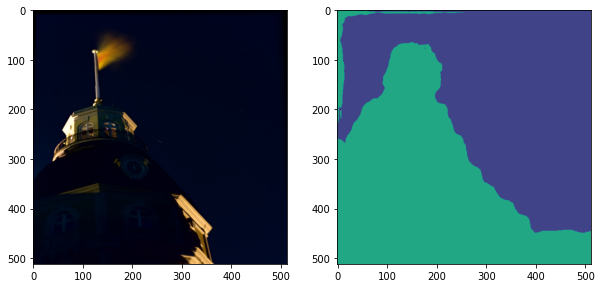

In [4]:
# Load the image and resize using PIL utilities.
_, img = load_image('/Users/leonjungemeyer/Downloads/IMG_2909.PNG', resize_to=(512, 512))
 
f, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img)

print(np.array(img).shape)

out_dict = model.predict({'image': img})
#print(out_dict['class_prediction'].shape)

print(np.min(out_dict['class_prediction']))
print(np.max(out_dict['class_prediction']))
axs[1].imshow(out_dict['class_prediction'], vmin=0, vmax=5)
plt.show()